In [14]:
import pandas as pd
import json
import os
from pprint import pprint 
import mysql.connector
from dash import Dash,dcc,html,dash_table
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregated Transaction

In [15]:
#This is to direct the path to get the data as states

path_agg_trans="C:/Guvi/Project/PhonePe Pulse Data Visualization and Exploration/pulse/data/aggregated/transaction/country/india/state/"
Agg_state_list=os.listdir(path_agg_trans)
Agg_state_list

#Agg_state_list--> to get the list of states in India

#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>#

#This is to extract the data's to create a dataframe

clm={'State':[], 'Year':[],'Quater':[],'Transacion_type':[], 'Transacion_count':[], 'Transacion_amount':[]}
for i in Agg_state_list:
    p_i=path_agg_trans+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            
            Data=open(p_k,'r')
            D=json.load(Data)
            for z in D['data']['transactionData']:
              Name=z['name']
              count=z['paymentInstruments'][0]['count']
              amount=z['paymentInstruments'][0]['amount']
              clm['Transacion_type'].append(Name)
              clm['Transacion_count'].append(count)
              clm['Transacion_amount'].append(amount)
              clm['State'].append(i)
              clm['Year'].append(j)
              clm['Quater'].append(int(k.strip('.json')))
#Succesfully created a dataframe
Agg_Trans=pd.DataFrame(clm)


In [8]:
Agg_Trans

,State,Year,Quater,Transacion_type,Transacion_count,Transacion_amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05
...,...,...,...,...,...,...
4129,west-bengal,2023,3,Merchant payments,296965002,2.004404e+11
4130,west-bengal,2023,3,Peer-to-peer payments,271150280,8.310501e+11
4131,west-bengal,2023,3,Recharge & bill payments,63055684,3.920985e+10
4132,west-bengal,2023,3,Financial Services,389751,4.249856e+08


# Aggregated User

In [16]:
#This is to direct the path to get the data as states

path_agg_user ="C:/Guvi/Project/PhonePe Pulse Data Visualization and Exploration/pulse/data/aggregated/user/country/india/state/"
Agg_state_list=os.listdir(path_agg_user)
Agg_state_list
#Agg_state_list--> to get the list of states in India

#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>#

#This is to extract the data's to create a dataframe

clm={'State':[], 'Year':[],'Quater':[],'Brand':[], 'User_count':[], 'User_percentage':[]}
for i in Agg_state_list:
    p_i=path_agg_user+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            try:
              for z in D['data']['usersByDevice']:  
                B_Name= z['brand']
                count= z['count']
                percentage= z['percentage']
                clm['Brand'].append(B_Name)
                clm['User_count'].append(count)
                clm['User_percentage'].append(percentage)
                clm['State'].append(i)
                clm['Year'].append(j)
                clm['Quater'].append(int(k.strip('.json')))
            except : pass
#Succesfully created a dataframe
Agg_User=pd.DataFrame(clm)

In [13]:
Agg_User

,State,Year,Quater,Brand,User_count,User_percentage
0,andaman-&-nicobar-islands,2018,1,Xiaomi,1665,0.247033
1,andaman-&-nicobar-islands,2018,1,Samsung,1445,0.214392
2,andaman-&-nicobar-islands,2018,1,Vivo,982,0.145697
3,andaman-&-nicobar-islands,2018,1,Oppo,501,0.074332
4,andaman-&-nicobar-islands,2018,1,OnePlus,332,0.049258
...,...,...,...,...,...,...
6727,west-bengal,2022,1,Lenovo,330017,0.015056
6728,west-bengal,2022,1,Infinix,284678,0.012987
6729,west-bengal,2022,1,Asus,280347,0.012790
6730,west-bengal,2022,1,Apple,277752,0.012671


# Map Transaction

In [17]:
path_map_transaction =r"C:\Guvi\Project\PhonePe Pulse Data Visualization and Exploration\pulse\data\map\transaction\hover\country\india\state/"
Map_state_list=os.listdir(path_map_transaction)
Map_state_list
#Agg_state_list--> to get the list of states in India

#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>#

#This is to extract the data's to create a dataframe

clm={'State':[], 'Year':[],'Quater':[],'Region':[], 'Count':[], 'Amount':[]}
for i in Map_state_list:
    p_i=path_map_transaction+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            
            for z in D['data']['hoverDataList']:  
              region= z['name']
              count= z['metric'][0]['count']
              amount= z['metric'][0]['amount']
              clm['Region'].append(region)
              clm['Count'].append(count)
              clm['Amount'].append(amount)
              clm['State'].append(i)
              clm['Year'].append(j)
              clm['Quater'].append(int(k.strip('.json')))
            
#Succesfully created a dataframe
Map_Trans=pd.DataFrame(clm)

In [11]:
Map_Trans

,State,Year,Quater,Region,Count,Amount
0,andaman-&-nicobar-islands,2018,1,north and middle andaman district,442,9.316631e+05
1,andaman-&-nicobar-islands,2018,1,south andaman district,5688,1.256025e+07
2,andaman-&-nicobar-islands,2018,1,nicobars district,528,1.139849e+06
3,andaman-&-nicobar-islands,2018,2,north and middle andaman district,825,1.317863e+06
4,andaman-&-nicobar-islands,2018,2,south andaman district,9395,2.394824e+07
...,...,...,...,...,...,...
16827,west-bengal,2023,3,nadia district,30146530,5.787869e+10
16828,west-bengal,2023,3,birbhum district,17597047,3.090737e+10
16829,west-bengal,2023,3,purba medinipur district,34244893,6.813718e+10
16830,west-bengal,2023,3,maldah district,28539407,5.299766e+10


# Map User

In [18]:
path_map_user =r"C:\Guvi\Project\PhonePe Pulse Data Visualization and Exploration\pulse\data\map\user\hover\country\india\state/"
Map_state_list=os.listdir(path_map_user)
Map_state_list
#Agg_state_list--> to get the list of states in India

#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>#

#This is to extract the data's to create a dataframe

clm={'State':[], 'Year':[],'Quater':[],'Region':[], 'Count':[]}
for i in Map_state_list:
    p_i=path_map_user+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
             
            for y,z in D['data']['hoverData'].items():  
                region = y
                count = z['registeredUsers']
                clm['Region'].append(region)
                clm['Count'].append(count)
                clm['State'].append(i)
                clm['Year'].append(j)
                clm['Quater'].append(int(k.strip('.json')))
            
#Succesfully created a dataframe
Map_Users=pd.DataFrame(clm)

In [52]:
Map_Users

,State,Year,Quater,Region,Count
0,andaman-&-nicobar-islands,2018,1,north and middle andaman district,632
1,andaman-&-nicobar-islands,2018,1,south andaman district,5846
2,andaman-&-nicobar-islands,2018,1,nicobars district,262
3,andaman-&-nicobar-islands,2018,2,north and middle andaman district,911
4,andaman-&-nicobar-islands,2018,2,south andaman district,8143
...,...,...,...,...,...
16831,west-bengal,2023,3,nadia district,1544294
16832,west-bengal,2023,3,birbhum district,974363
16833,west-bengal,2023,3,purba medinipur district,1530289
16834,west-bengal,2023,3,maldah district,1091634


# Top Transaction District

In [19]:
path_top_transaction =r"C:\Guvi\Project\PhonePe Pulse Data Visualization and Exploration\pulse\data\top\transaction\country\india\state/"
Map_state_list=os.listdir(path_top_transaction)
Map_state_list
#Agg_state_list--> to get the list of states in India

#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>#

#This is to extract the data's to create a dataframe

clm1={'State':[], 'Year':[],'Quater':[],'Districts':[],'Amount':[],'Count':[]}

for i in Map_state_list:
    p_i=path_top_transaction+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            for z in D['data']['districts']:  
                region = z['entityName']
                count = z['metric']['count']
                amount = z['metric']['amount']
                clm1['Districts'].append(region)
                clm1['Amount'].append(amount)
                clm1['Count'].append(count)
                clm1['State'].append(i)
                clm1['Year'].append(j)
                clm1['Quater'].append(int(k.strip('.json')))
                            
#Succesfully created a dataframe
Top_Transaction_District=pd.DataFrame(clm1)

In [24]:
Top_Transaction_District

,State,Year,Quater,Districts,Amount,Count
0,andaman-&-nicobar-islands,2018,1,south andaman,1.256025e+07,5688
1,andaman-&-nicobar-islands,2018,1,nicobars,1.139849e+06,528
2,andaman-&-nicobar-islands,2018,1,north and middle andaman,9.316631e+05,442
3,andaman-&-nicobar-islands,2018,2,south andaman,2.394824e+07,9395
4,andaman-&-nicobar-islands,2018,2,nicobars,3.072437e+06,1120
...,...,...,...,...,...,...
6803,west-bengal,2023,3,hooghly,5.624223e+10,32021392
6804,west-bengal,2023,3,howrah,5.800237e+10,31734226
6805,west-bengal,2023,3,paschim bardhaman,4.340349e+10,30585672
6806,west-bengal,2023,3,paschim medinipur,5.043177e+10,30418455


# Top Transaction Pincodes

In [20]:
path_top_transaction =r"C:\Guvi\Project\PhonePe Pulse Data Visualization and Exploration\pulse\data\top\transaction\country\india\state/"
Map_state_list=os.listdir(path_top_transaction)
Map_state_list

clm2={'State':[], 'Year':[],'Quater':[],'Pincode':[],'Amount':[],'Count':[]}

for i in Map_state_list:
    p_i=path_top_transaction+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            for z in D['data']['pincodes']:
                region = z['entityName']
                count = z['metric']['count']
                amount = z['metric']['amount']
                clm2['Pincode'].append(region)
                clm2['Amount'].append(amount)
                clm2['Count'].append(count)
                clm2['State'].append(i)
                clm2['Year'].append(j)
                clm2['Quater'].append(int(k.strip('.json')))

Top_Transaction_Pincode=pd.DataFrame(clm2)

In [21]:
Top_Transaction_Pincode

,State,Year,Quater,Pincode,Amount,Count
0,andaman-&-nicobar-islands,2018,1,744101,2.769298e+06,1622
1,andaman-&-nicobar-islands,2018,1,744103,2.238042e+06,1223
2,andaman-&-nicobar-islands,2018,1,744102,3.519060e+06,969
3,andaman-&-nicobar-islands,2018,1,744105,1.298561e+06,685
4,andaman-&-nicobar-islands,2018,1,744104,1.039715e+06,340
...,...,...,...,...,...,...
8205,west-bengal,2023,3,700001,7.193522e+09,3536928
8206,west-bengal,2023,3,721301,4.871566e+09,3464729
8207,west-bengal,2023,3,700039,5.095825e+09,3405551
8208,west-bengal,2023,3,732125,5.353831e+09,3347165


# Top User Districts

In [21]:
path_top_user =r"C:\Guvi\Project\PhonePe Pulse Data Visualization and Exploration\pulse\data\top\user\country\india\state/"
Map_state_list=os.listdir(path_top_user)
Map_state_list
#Agg_state_list--> to get the list of states in India

#<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------>#

#This is to extract the data's to create a dataframe

clm1={'State':[], 'Year':[],'Quater':[],'Districts':[], 'Count':[]}
for i in Map_state_list:
    p_i=path_top_user+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            for z in D['data']['districts']:  
                region = z['name']
                count = z['registeredUsers']
                clm1['Districts'].append(region)
                clm1['Count'].append(count)
                clm1['State'].append(i)
                clm1['Year'].append(j)
                clm1['Quater'].append(int(k.strip('.json')))
            
#Succesfully created a dataframe
Top_User_District=pd.DataFrame(clm1)

In [33]:
Top_User_District

,State,Year,Quater,Districts,Count
0,andaman-&-nicobar-islands,2018,1,south andaman,5846
1,andaman-&-nicobar-islands,2018,1,north and middle andaman,632
2,andaman-&-nicobar-islands,2018,1,nicobars,262
3,andaman-&-nicobar-islands,2018,2,south andaman,8143
4,andaman-&-nicobar-islands,2018,2,north and middle andaman,911
...,...,...,...,...,...
6803,west-bengal,2023,3,howrah,1608895
6804,west-bengal,2023,3,nadia,1544294
6805,west-bengal,2023,3,purba medinipur,1530289
6806,west-bengal,2023,3,paschim medinipur,1384076


# Top User Pincodes

In [22]:
path_top_user =r"C:\Guvi\Project\PhonePe Pulse Data Visualization and Exploration\pulse\data\top\user\country\india\state/"
Map_state_list=os.listdir(path_top_user)
Map_state_list

clm2={'State':[], 'Year':[],'Quater':[],'Pincode':[], 'Count':[]}
for i in Map_state_list:
    p_i=path_top_user+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            for z in D['data']['pincodes']: 
                region = z['name']
                count = z['registeredUsers']
                clm2['Pincode'].append(region)
                clm2['Count'].append(count)
                clm2['State'].append(i)
                clm2['Year'].append(j)
                clm2['Quater'].append(int(k.strip('.json')))

Top_User_Pincode=pd.DataFrame(clm2)

In [35]:
Top_User_Pincode

,State,Year,Quater,Pincode,Count
0,andaman-&-nicobar-islands,2018,1,744103,1608
1,andaman-&-nicobar-islands,2018,1,744101,1108
2,andaman-&-nicobar-islands,2018,1,744105,1075
3,andaman-&-nicobar-islands,2018,1,744102,1006
4,andaman-&-nicobar-islands,2018,1,744104,272
...,...,...,...,...,...
8206,west-bengal,2023,3,700015,122316
8207,west-bengal,2023,3,742304,119245
8208,west-bengal,2023,3,721101,118798
8209,west-bengal,2023,3,700150,114987


# MySQL Connection

In [23]:
db = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Nirmal9699',
    database = 'phonepe_pulse_data_visualization'
)

cur = db.cursor()
db.commit()

# Aggregated Transaction

In [24]:
sql = """ create table agg_trans (State varchar(75), Year int, Quarter int, Transaction_Type varchar(75),
          Transaction_Count int,Transaction_Amount Dec(20,2))"""    
cur.execute(sql)

In [25]:
sql_at = "insert into agg_trans values(%s,%s,%s,%s,%s,%s)"
for i in Agg_Trans.to_records().tolist():
    cur.execute(sql_at,i[1:])
db.commit()

# Aggregated User

In [32]:
sql = """ create table agg_user (State varchar(75), Year int, Quarter int, Brand varchar(75),
             User_Count int,User_Percentage Dec(20,2))"""    
cur.execute(sql)

In [33]:
sql_au = "insert into agg_user values(%s,%s,%s,%s,%s,%s)"
for i in Agg_User.to_records().tolist():
    cur.execute(sql_au,i[1:])
db.commit()

# Map Transaction

In [34]:
sql = """ create table map_trans (State varchar(75), Year int, Quarter int, Region varchar(125),
             Count int,Amount Dec(20,2))"""    
cur.execute(sql)

In [35]:
sql_mt = "insert into map_trans values(%s,%s,%s,%s,%s,%s)"
for i in Map_Trans.to_records().tolist():
    cur.execute(sql_mt,i[1:])
db.commit()

# Map User

In [36]:
sql = """ create table map_user (State varchar(75), Year int, Quarter int, Region varchar(125),
             Count int)"""    
cur.execute(sql)

In [37]:
sql_mu = "insert into map_user values(%s,%s,%s,%s,%s)"
for i in Map_Users.to_records().tolist():
    cur.execute(sql_mu,i[1:])
db.commit()

# Top Transaction Districts

In [38]:
sql = """ create table top_trans_dis (State varchar(75), Year int, Quarter int, District varchar(125),
             Count Dec(20,2), Amount Dec(20,2))"""    
cur.execute(sql)

In [39]:
sql_ttd = "insert into top_trans_dis values(%s,%s,%s,%s,%s,%s)"
for i in Top_Transaction_District.to_records().tolist():
    cur.execute(sql_ttd,i[1:])
db.commit()

# Top Transaction Pincodes

In [45]:
sql = """ create table top_trans_pin (State varchar(75), Year int, Quarter int, District varchar(125),
             Count Dec(20,2), Amount Dec(20,2))"""    
cur.execute(sql)

In [46]:
sql_ttp = "insert into top_trans_pin values(%s,%s,%s,%s,%s,%s)"
for i in Top_Transaction_Pincode.to_records().tolist():
    cur.execute(sql_ttp,i[1:])
db.commit()

# Top User Districts

In [42]:
sql = """ create table top_user_dis (State varchar(75), Year int, Quarter int, District varchar(125),
             Count Dec(20,2))"""    
cur.execute(sql)

In [43]:
sql_tud = "insert into top_user_dis values(%s,%s,%s,%s,%s)"
for i in Top_User_District.to_records().tolist():
    cur.execute(sql_tud,i[1:])
db.commit()

# Top User Pincodes

In [51]:
sql = """ create table top_user_pin (State varchar(75), Year int, Quarter int, Pincode varchar(125),
             Count Dec(20,2))"""    
cur.execute(sql)

In [52]:
sql_tup = "insert into top_user_pin values(%s,%s,%s,%s,%s)"
for i in Top_User_Pincode.to_records().tolist():
    cur.execute(sql_tup,i[1:])
db.commit()

# MySQL Connection

In [53]:
db = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Nirmal9699',
    database = 'phonepe_pulse_data_visualization'
)

cur = db.cursor()
db.commit()

# Graph

In [54]:
sql1 = "select * from phonepe_pulse_data_visualization.agg_trans where state='tamil-nadu'"
q1 = pd.read_sql_query(sql1,db)
q1

C:\Users\winne\AppData\Local\Temp\ipykernel_14384\3534497928.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q1 = pd.read_sql_query(sql1,db)


,State,Year,Quarter,Transaction_Type,Transaction_Count,Transaction_Amount
0,tamil-nadu,2018,1,Recharge & bill payments,3308548,6.460283e+08
1,tamil-nadu,2018,1,Peer-to-peer payments,2670613,1.003152e+10
2,tamil-nadu,2018,1,Merchant payments,326510,2.720021e+08
3,tamil-nadu,2018,1,Financial Services,115363,3.187607e+07
4,tamil-nadu,2018,1,Others,305588,2.801323e+08
...,...,...,...,...,...,...
110,tamil-nadu,2023,3,Merchant payments,309648502,1.474810e+11
111,tamil-nadu,2023,3,Peer-to-peer payments,198678217,6.416242e+11
112,tamil-nadu,2023,3,Recharge & bill payments,47138716,4.339841e+10
113,tamil-nadu,2023,3,Financial Services,320645,3.730418e+08


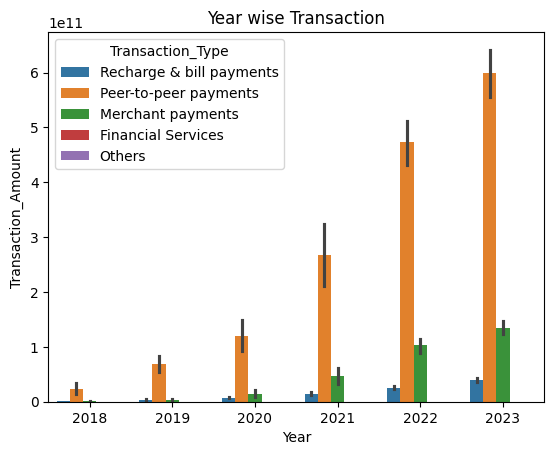

In [56]:
sns.barplot(q1, x='Year', y='Transaction_Amount', hue = 'Transaction_Type')
plt.title('Year wise Transaction')
plt.xlabel('Year')
plt.ylabel('Transaction_Amount')
plt.show()

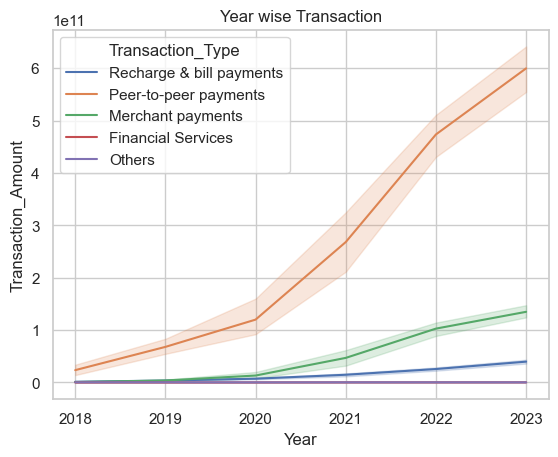

In [57]:
sns.set(style="whitegrid")

sns.lineplot(x='Year', y='Transaction_Amount', data=q1,hue='Transaction_Type')
plt.title('Year wise Transaction')
plt.xlabel('Year')
plt.ylabel('Transaction_Amount')
plt.show()

In [61]:
sql2 = "SELECT state, SUM(Transaction_Count) AS total_column FROM agg_trans GROUP BY state ORDER BY total_column DESC LIMIT 8"
q2 = pd.read_sql_query(sql2,db)
q2

C:\Users\winne\AppData\Local\Temp\ipykernel_14384\3902768198.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q2 = pd.read_sql_query(sql2,db)


,state,total_column
0,maharashtra,1.659214e+10
1,karnataka,1.585187e+10
2,telangana,1.412462e+10
3,andhra-pradesh,9.248342e+09
4,rajasthan,8.361862e+09
5,uttar-pradesh,8.205217e+09
6,madhya-pradesh,7.025112e+09
7,delhi,4.713504e+09


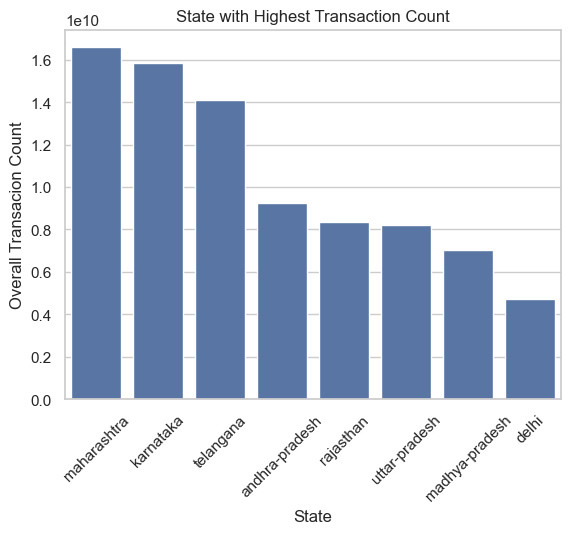

In [70]:
sns.barplot(q2, x='state', y='total_column')
plt.title('State with Highest Transaction Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Overall Transacion Count')
plt.show()

In [71]:
sql3 = """WITH RankedData AS ( SELECT State,Quarter,Brand,ROUND(User_Percentage * 100) AS Percentage,
    ROW_NUMBER() OVER (PARTITION BY Quarter ORDER BY User_Percentage DESC) AS RowNum
    FROM phonepe_pulse_data_visualization.agg_user
    WHERE State = 'tamil-nadu' AND Year = 2021)
SELECT State,Quarter,Brand,Percentage
FROM RankedData
WHERE RowNum <= 5;"""
q3 = pd.read_sql_query(sql3,db)
q3

C:\Users\winne\AppData\Local\Temp\ipykernel_14384\1757094013.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q3 = pd.read_sql_query(sql3,db)


,State,Quarter,Brand,Percentage
0,tamil-nadu,1,Xiaomi,23.0
1,tamil-nadu,1,Vivo,20.0
2,tamil-nadu,1,Samsung,19.0
3,tamil-nadu,1,Oppo,11.0
4,tamil-nadu,1,Others,9.0
5,tamil-nadu,2,Xiaomi,23.0
6,tamil-nadu,2,Vivo,20.0
7,tamil-nadu,2,Samsung,19.0
8,tamil-nadu,2,Oppo,11.0
9,tamil-nadu,2,Others,8.0


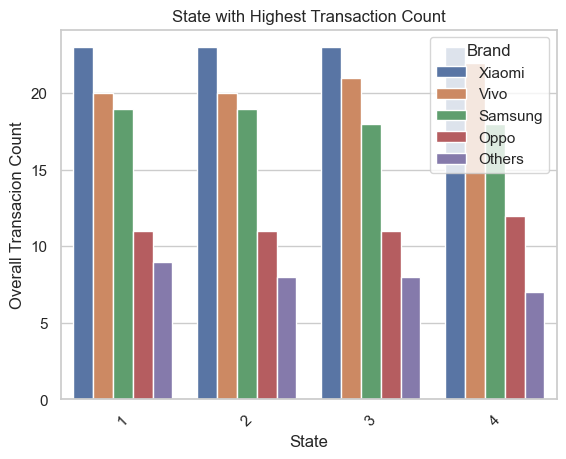

In [73]:
sns.barplot(q3, x='Quarter', y='Percentage',hue='Brand')
plt.title('State with Highest Transaction Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Overall Transacion Count')
plt.show()